# Kmeans for clustering

In [2]:
from sklearn.datasets.samples_generator import make_blobs
from pandas import DataFrame
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.metrics import davies_bouldin_score
warnings.filterwarnings('ignore')

## Synthetic dataset generation

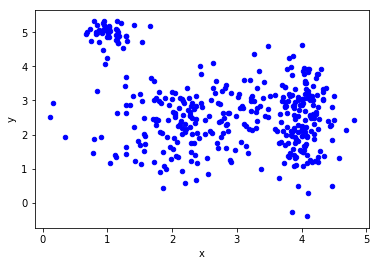

In [5]:
# generate 2d classification dataset
cent = [[1,5],[2.5,2.5],[4,2.5]]
dev = [[0.2,0.2],[0.85,0.85],[0.2,1]]

X1, y1 = make_blobs(n_samples=[50,200,150], centers=cent, n_features=2, cluster_std=dev , random_state=50)
# scatter plot, dots colored by class value
df = DataFrame(dict(x=X1[:,0], y=X1[:,1], label=y1))
colors = {0:'red', 1:'blue', 2:'green'}
fig, ax = plt.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', color='blue')
plt.show()

### Visualization of K-means iterations

Total number iterations: 17


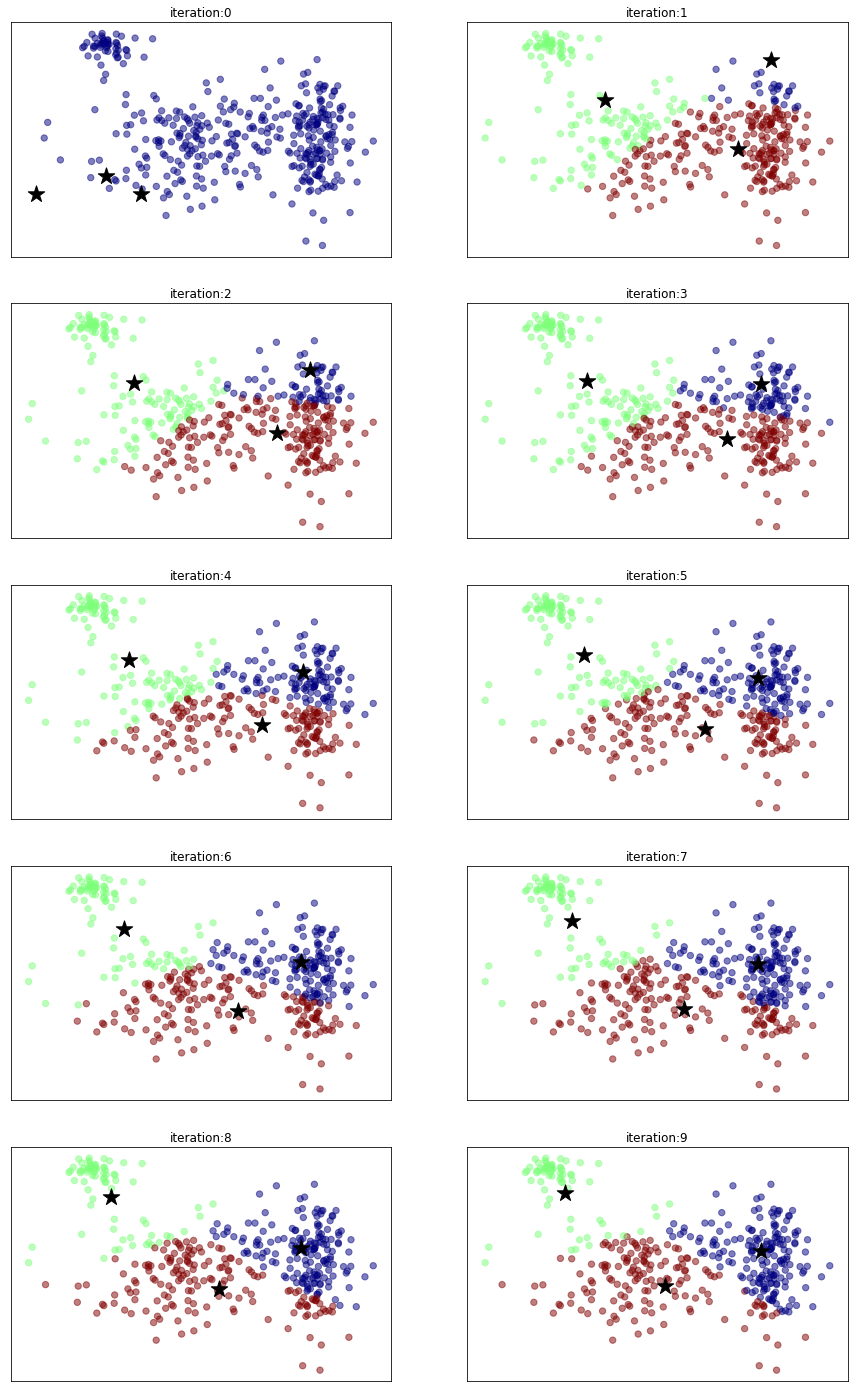

### Kmeans with different types of initializations

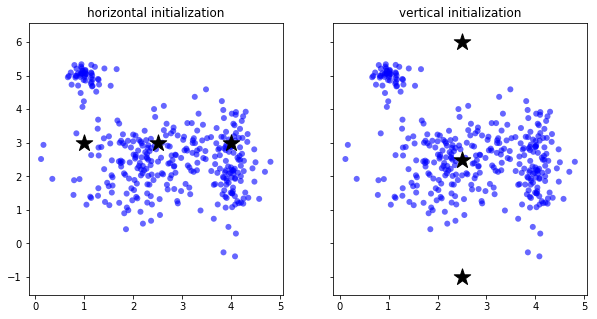

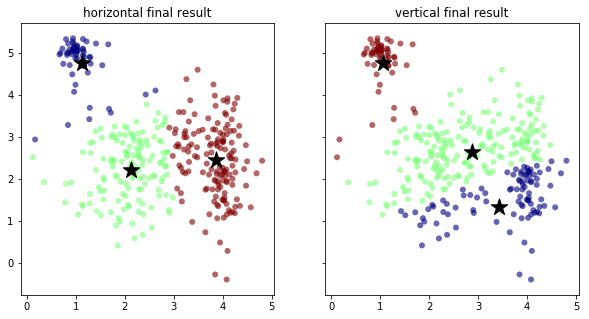

In [58]:
wcss = []
sil_score = []
db_score = []
cl=[]
cc=[]

init_type = ["horizontal", "vertical"]#, "random", "k-means++"]
init_array = [np.array([[1,3],[2.5,3],[4,3]]),np.array([[2.5,-1],[2.5,2.5],[2.5,6]])]#, np.random.randint(5, size=(3,2)), "k-means++"]

X, y = make_blobs(n_samples=[50,200,100], centers=cent, n_features=2, cluster_std=dev , random_state=50)

for init_i in init_array:
    kmeans = KMeans(n_clusters=3, init=init_i, n_init=10, max_iter=3) 
    cluster_labels = kmeans.fit_predict(X)
    cluster_center = kmeans.cluster_centers_
    cl.append(cluster_labels)
    cc.append(cluster_center)
    
    wcss.append(kmeans.inertia_ )
    silhouette_avg = silhouette_score(X, cluster_labels)
    sil_score.append(silhouette_avg)
    
    db = davies_bouldin_score(X, cluster_labels)
    db_score.append(db)

f, ax = plt.subplots(1, len(init_type), figsize=(5*len(init_type),5), sharey=True)
for i in range(len(init_type)):

    ax[i].scatter(X[:,0], X[:,1],  c='blue', cmap = "jet", edgecolor = "None", alpha=0.6)
    ax[i].scatter(init_array[i][:,0], init_array[i][:, 1], s=300, cmap='jet', zorder=2, c='black', marker="*")
    ax[i].set_title(init_type[i]+" initialization")

    
f, ax = plt.subplots(1, len(init_type), figsize=(5*len(init_type),5), sharey=True)
for i in range(len(init_type)):

    ax[i].scatter(X[:,0], X[:,1],  c=cl[i], cmap = "jet", edgecolor = "None", alpha=0.6)
    ax[i].scatter(cc[i][:,0], cc[i][:, 1], s=300, cmap='jet', zorder=2, c='black', marker="*")
    ax[i].set_title(init_type[i]+" final result")


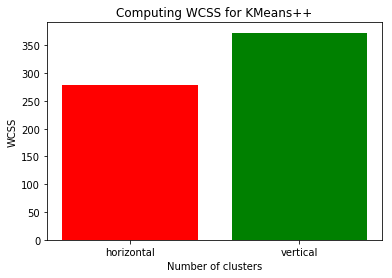

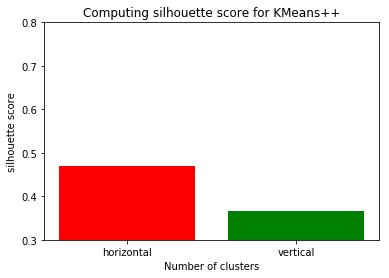

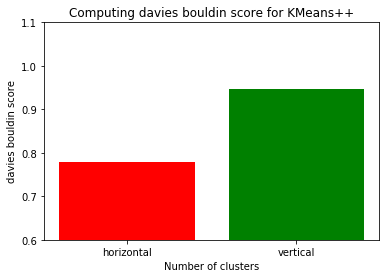

In [37]:
 
plt.bar( k, wcss , label="WCSS", color=['r','g','b','y'])
plt.title("Computing WCSS for KMeans++")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
# plt.ylim(700,850)
plt.show()

plt.bar( k, sil_score, label="silhouette score", color=['r','g','b','y'])
plt.title("Computing silhouette score for KMeans++")
plt.xlabel("Number of clusters")
plt.ylabel("silhouette score")
plt.ylim(.3,.8)
plt.show()

plt.bar( k, db_score, label="davies bouldin score", color=['r','g','b','y'])
plt.title("Computing davies bouldin score for KMeans++")
plt.xlabel("Number of clusters")
plt.ylabel("davies bouldin score")
plt.ylim(.6,1.1)
plt.show()

## K-means with different random init

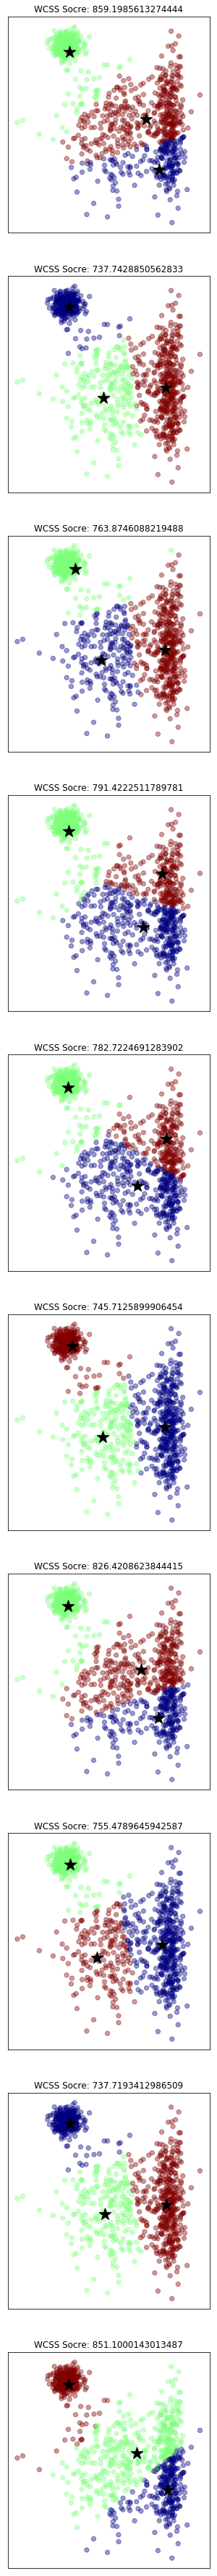

In [164]:
f, ax = plt.subplots(10,1, figsize=(5,65))

for i in range(10):
    np.random.seed(i)
    kmeans = KMeans(n_clusters=3, init=np.random.randint(5, size=(3,2)), n_init=10, max_iter=4, random_state=i)
    cluster_labels = kmeans.fit_predict(X)
    cluster_center = kmeans.cluster_centers_

    ax[i].scatter(X[:, 0], X[:, 1], c=cluster_labels, s=40, cmap='jet', zorder=2, alpha=0.4)
    ax[i].scatter(cluster_center[:,0], cluster_center[:, 1], s=300, cmap='jet', zorder=2, c='black', marker="*")
    ax[i].get_xaxis().set_visible(False)
    ax[i].get_yaxis().set_visible(False)
    ax[i].set_title("WCSS Socre: "+str(kmeans.inertia_))

### Kmeans with different number of clusters (k)

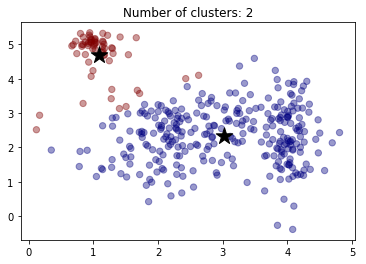

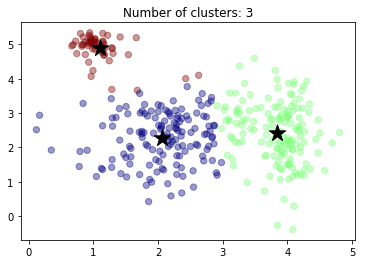

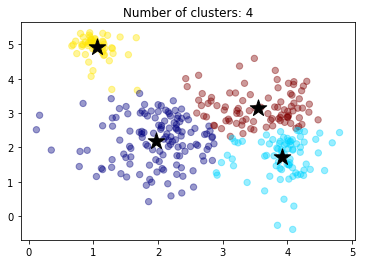

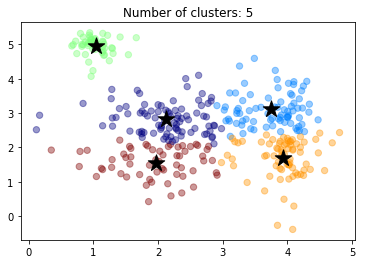

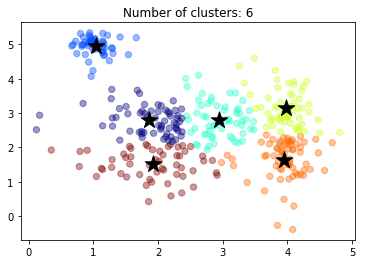

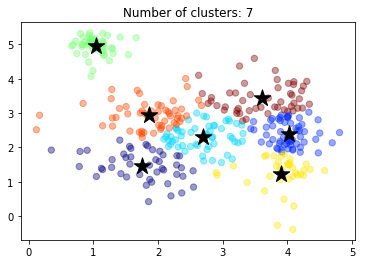

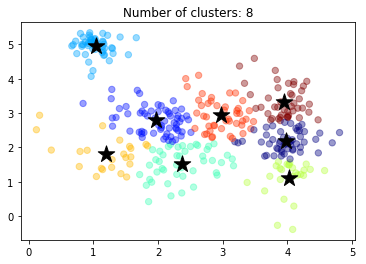

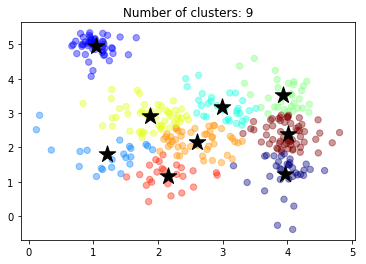

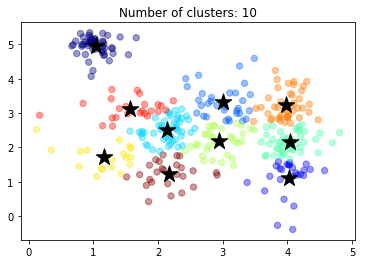

In [46]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.metrics import davies_bouldin_score

wcss = []
sil_score = []
db_score = []

k = 10

for i in range(1,10):
    kmeans = KMeans(n_clusters=i+1, init="k-means++", n_init=10, max_iter=200) 
    cluster_labels = kmeans.fit_predict(X)
    cluster_center = kmeans.cluster_centers_
    
    wcss.append( kmeans.inertia_ )
    silhouette_avg = silhouette_score(X, cluster_labels)
    sil_score.append(silhouette_avg)
    
    db = davies_bouldin_score(X, cluster_labels)
    db_score.append(db)

    plt.scatter(X[:, 0], X[:, 1], c=cluster_labels, s=40, cmap='jet', zorder=2, alpha=0.4)
    plt.scatter(cluster_center[:,0], cluster_center[:, 1], s=300, cmap='jet', zorder=2, c='black', marker="*")
    plt.title("Number of clusters: "+str(i+1))
    plt.show()

### Elbow plot

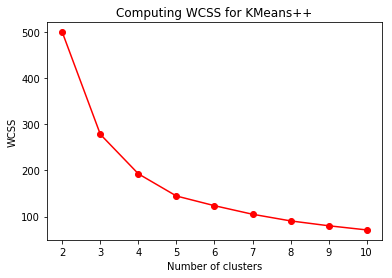

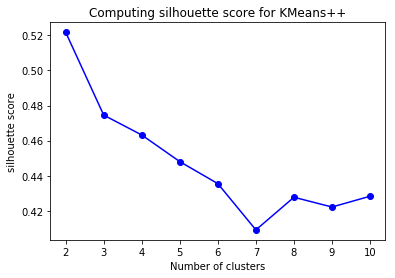

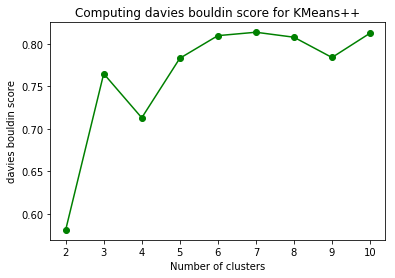

In [54]:
plt.plot([i for i in range(2,k+1)], wcss , 'ro-', label="WCSS")
plt.title("Computing WCSS for KMeans++")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

plt.plot([i for i in range(2,k+1)], sil_score, 'bo-', label="silhouette score")
plt.title("Computing silhouette score for KMeans++")
plt.xlabel("Number of clusters")
plt.ylabel("silhouette score")
plt.show()

plt.plot( [i for i in range(2,k+1)], db_score, 'go-', label="davies bouldin score")
plt.title("Computing davies bouldin score for KMeans++")
plt.xlabel("Number of clusters")
plt.ylabel("davies bouldin score")
plt.show()

In [50]:
[i for i in range(k)]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [49]:
len(wcss)

9